## 6.2 Practice Project- Insurance Cost Analysis

In this project, you have to perform analytics operations on an insurance database

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

### Task-1: Import the dataset

In [17]:
filename="insurance.csv"
df=pd.read_csv(filename, header=0)
df.head()

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [18]:
df=pd.read_csv(filename, header=None)
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


Add the headers to the dataframe, as mentioned in the project scenario:

In [24]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers

Now, replace the '?' entries with NaN values:

In [25]:
df.replace('?', np.nan, inplace=True)

### Task-2: Data Wrangling

Use dataframe.info() to identify the columns that have some 'Null' (or NaN) information:

In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


In [27]:
df.isnull()

,age,gender,bmi,no_of_children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2767,False,False,False,False,False,False,False
2768,False,False,False,False,False,False,False
2769,False,False,False,False,False,False,False
2770,False,False,False,False,False,False,False


In [29]:
df.notnull()

,age,gender,bmi,no_of_children,smoker,region,charges
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
2767,True,True,True,True,True,True,True
2768,True,True,True,True,True,True,True
2769,True,True,True,True,True,True,True
2770,True,True,True,True,True,True,True


Handle missing data:
* For continuous attributes (e.g., age), replace missing values with the mean.
* For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
* Update the data types of the respective columns.
* Verify the update using df.info().

In [30]:
# for the continuous attribute age
avg_age = df["age"].astype("float").mean(axis=0)
df["age"].replace(np.nan, avg_age, inplace=True)
# for the categorical attribute smoker
# first of all, we have to calculate the most common value for the attribute smoker
is_smoker = df["smoker"].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)
# change the data types
df[["age", "smoker"]] = df[["age", "smoker"]].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int32  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int32  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.1 KB


Also note, that the charges column has values which are more than 2 decimal places long. Update the charges column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe:

In [31]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [36]:
df["charges"] = np.round(df["charges"], 2)

In [37]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


### Task-3: Exploratory Data Analysisi (EDA)

Implement the regression plot for **charges** with respect **bmi**:

(0.0, 66902.85800000001)

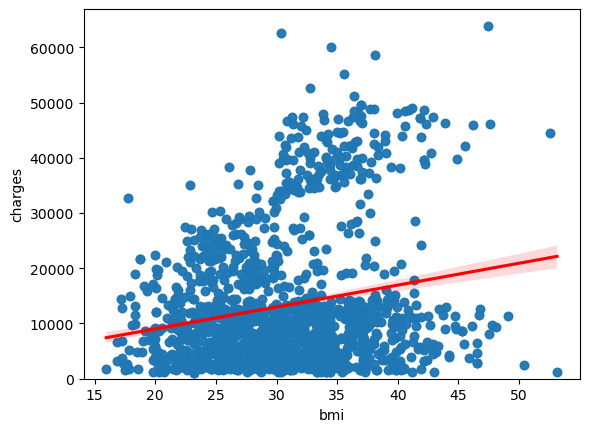

In [42]:
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color":"red"})
plt.ylim(0,)

BE: Simdi bir de Scatterplot'la deneyelim:

Text(0, 0.5, 'Charges')

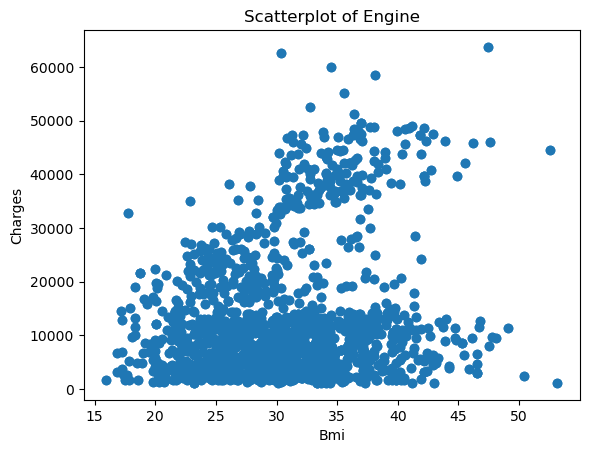

In [48]:
x=df["bmi"]
y=df["charges"]
plt.scatter(x,y)
plt.title("Scatterplot of Engine")
plt.xlabel("Bmi")
plt.ylabel("Charges")

Streudiagramme sind ideal, wenn wir die Beziehung zwischen zwei kontinuierliche Variablen möchten, in diesem Fall Body Mass Index vs. Charges. In einem Streudiagramm setzen wir Prädiktorvariable normalerweise immer auf x-Achse und die Zielvariable auf die y-Achse!'

Implement the box plot for **charges** with respect to **smoker**:

<Axes: xlabel='smoker', ylabel='charges'>

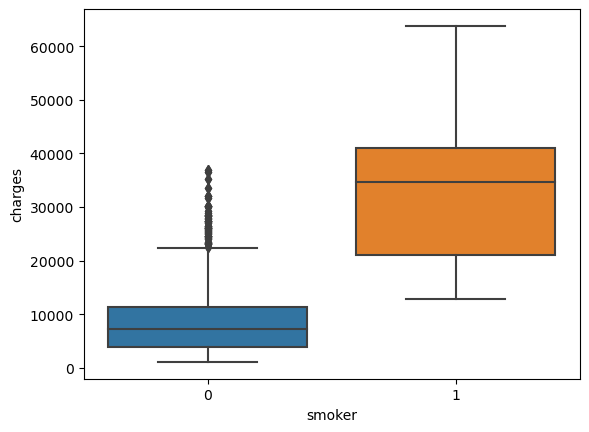

In [53]:
sns.boxplot(x="smoker", y="charges", data=df)

Print the correlation matrix for the dataset:

In [55]:
df.corr()

,age,gender,bmi,no_of_children,smoker,region,charges
age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
bmi,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
no_of_children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


### Task-4: Model Development

Fit a linear regression model that may be used to predict the **charges** value, just by using the **smoker** attribute of the dataset. Print the R^2 score of this model.

(Now that we have seen how we can evaluate a model by using visualization, we want to numerically evaluate our models. Two important measures are: MSE and R^2). 

In [57]:
lm = LinearRegression()
X = df [["smoker"]]
Y = df [["charges"]]
lm.fit(X,Y)
lm.score(X,Y)

0.6221791733924185

Fit a linear regression model that may be used to predict the charges value, just by using all other attributes of the dataset. Print the R^2 score of this model. You should see an improvement in the performance:

In [62]:
Z = df [["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
lm.score(Z,Y)

0.7504083820289634

Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance:

In [63]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('model',LinearRegression())]
# Creating the pipeline constructor:
pipeline_object = Pipeline(Input)
Z = Z.astype(float)
pipeline_object.fit(Z,Y)
ypipe=pipeline_object.predict(Z)
r2_score(Y,ypipe)

0.845257537740411

### Task-5: Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing:

In [64]:
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.20, random_state=0)

Initialize a Ridge regressor that used hyperparameter. Fit the model using training data data subset. Print the R^2 score for the testing data:

In [65]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)
Yhat=RidgeModel.predict(x_test)
Yhat[0:10]
r2_score(y_test,Yhat)

0.7469894680059708

Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the R^2 score for the testing subset:

In [66]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.8410037679926492
